In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

In [ ]:
path='/content/drive/My Drive/Brain_Tumor/'

In [ ]:
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

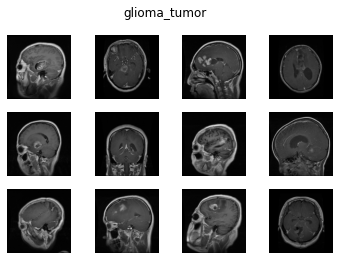

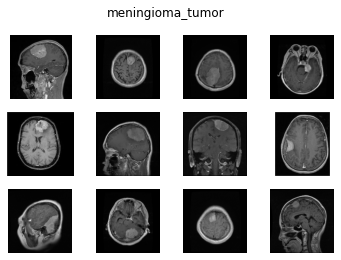

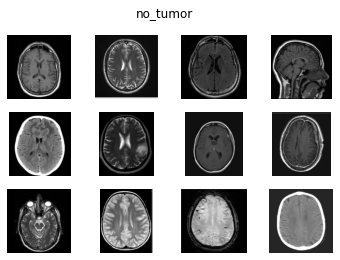

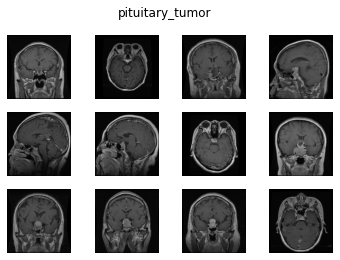

In [ ]:
# let's display some of the pictures
for category in categories:
  fig, _=plt.subplots(3,4)
  fig.suptitle(category)
  for k, v in enumerate(os.listdir(path+category) [:12]):
    img=plt.imread(path+category+'/'+v)
    plt.subplot(3,4,k+1)
    plt.axis("off")
    plt.imshow(img)
  plt.show()

In [ ]:
#for check image height and width
shape0=[]
shape1=[]

for category in categories:
  for files in os.listdir(path+category):
      shape0.append(plt.imread(path+category+'/'+ files).shape[0])
      shape1.append(plt.imread(path+category+'/'+files).shape[1])
  print(category,'=>Height:',min(shape0),'=>Width:',min(shape1))
  print(category,'=>Height:',max(shape0),'=>Width:',max(shape1))        

glioma_tumor =>Height: 512 =>Width: 512
glioma_tumor =>Height: 512 =>Width: 512


KeyboardInterrupt: ignored

In [ ]:
for k, category in enumerate(categories):
  print(k)
  print(category)

0
glioma_tumor
1
meningioma_tumor
2
no_tumor
3
pituitary_tumor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Preprocess data and label inputs
# initialize the data and labels
data=[]
label=[]
imagePaths=[]
HEIGHT=224
WIDTH=224
N_CHANNEL=3

for k, category in enumerate(categories):
  for f in os.listdir(path+category):
    imagePaths.append([path+category+'/'+f,k])# k=0 : 'Normal', k=1 : 'Abnormal'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

label=[]
labels=[]
for imagePath in imagePaths:
  image = cv2.imread(imagePath[0])
  image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
  data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
  label = imagePath[1]
  labels.append(label)
print(labels)#labels are target varible

[['/content/drive/My Drive/Brain_Tumor/glioma_tumor/gg (815).jpg', 0], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m2 (41).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/glioma_tumor/gg (407).jpg', 0], ['/content/drive/My Drive/Brain_Tumor/glioma_tumor/gg (272).jpg', 0], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m1(13).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/pituitary_tumor/p (716).jpg', 3], ['/content/drive/My Drive/Brain_Tumor/pituitary_tumor/p (383).jpg', 3], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m (195).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m (27).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/pituitary_tumor/p (151).jpg', 3]]
[0, 1, 0, 0, 1, 3, 3, 1, 1, 3, 0, 1, 0, 1, 1, 3, 1, 0, 1, 0, 0, 3, 3, 0, 1, 3, 1, 1, 1, 1, 3, 1, 2, 3, 0, 2, 1, 2, 2, 3, 3, 2, 0, 0, 3, 0, 3, 1, 0, 2, 3, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 0, 3, 0, 3, 1, 3, 3, 1, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 2, 0, 0, 3, 0, 1, 1, 3, 0, 2, 3, 1, 0, 

In [ ]:
# scale the raw pixel intensities to the range [0, 1]
import numpy as np

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print(labels)

[0 0 3 ... 2 0 3]


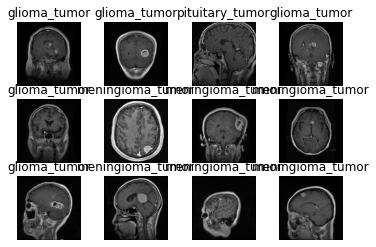

In [ ]:
plt.subplots(3,4)
for i in range(12):
  
  plt.subplot(3,4,i+1)
  plt.imshow(data[i])
  plt.axis("off")
  plt.title(categories[labels[i]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.4,random_state=42)

In [ ]:
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 4)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1728, 224, 224, 3)
(1152, 224, 224, 3)
(1728, 4)
(1152,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout


In [ ]:

model = Sequential()

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',strides=1,activation='relu',input_shape=(HEIGHT,WITDH,N_CHANNELS)))
model.add(MaxPooling2D(pool_size=2,))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=2048,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

NameError: ignored

In [ ]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
54/54 [==============================] - 5s 87ms/step - loss: 1.9345 - accuracy: 0.5353
Epoch 2/25
54/54 [==============================] - 5s 90ms/step - loss: 0.6413 - accuracy: 0.7176
Epoch 3/25
54/54 [==============================] - 5s 87ms/step - loss: 0.4034 - accuracy: 0.8443
Epoch 4/25
54/54 [==============================] - 5s 88ms/step - loss: 0.2181 - accuracy: 0.9265
Epoch 5/25
54/54 [==============================] - 5s 88ms/step - loss: 0.1133 - accuracy: 0.9601
Epoch 6/25
54/54 [==============================] - 5s 88ms/step - loss: 0.0452 - accuracy: 0.9873
Epoch 7/25
54/54 [==============================] - 5s 88ms/step - loss: 0.0206 - accuracy: 0.9942
Epoch 8/25
54/54 [==============================] - 5s 88ms/step - loss: 0.0283 - accuracy: 0.9890
Epoch 9/25
54/54 [==============================] - 5s 87ms/step - loss: 0.0294 - accuracy: 0.9890
Epoch 10/25
54/54 [==============================] - 5s 88ms/step - loss: 0.0309 - accuracy: 0.9936
Epoch 11/

In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix,accuracy_score
pred=model.predict(testX)
predictions = argmax(pred, axis=1) 
cm = confusion_matrix(testY, predictions)
cm

array([[310,  23,   1,   2],
       [ 27, 277,  34,   7],
       [  3,  17, 128,   9],
       [  5,   1,   0, 308]])

In [ ]:
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 88.80%


In [ ]:
test_data=[]
test_image_o=cv2.imread('/content/drive/My Drive/Brain_Tumor/glioma_tumor/gg (101).jpg')
test_image=cv2.resize(test_image_o,(WIDTH,HEIGHT))# .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data=np.array(test_image,dtype="float")/255.0
test_data=test_data.reshape([-1,224, 224, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

Prediction : glioma_tumor
